# **Cardiovascular Disease Portfolio Project**

### Import librarys

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

### Import dataframe ###

In [3]:
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')

## Exploratory Data Analysis

### Inspect dataframe

In [4]:
print(df.head())
print(df.dtypes)
print(df.describe(include = 'all'))
print(df.isnull().sum())

   patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   

   slope  noofmajorvessels  target  
0      3                 3       1  
1      1                 1       0  
2    

*This shows:*
- All expected collumns are present, all of which are integers expect 'oldpeak' which is a float
- There are no null values

### Heart disease is associated with old age and men. Is this reflected in the dataset? ###
As this could indicate bias in the dataset

In [ ]:
print(df.target.value_counts())
print(df.gender.value_counts())

*This shows:*
- 580 with heart disease, 420 without -- significantly higher than the prevalence in the general population
- 765 male, 235 female -- significant male skew

#### Visual inspection  of Heart Diesase and Gender variables

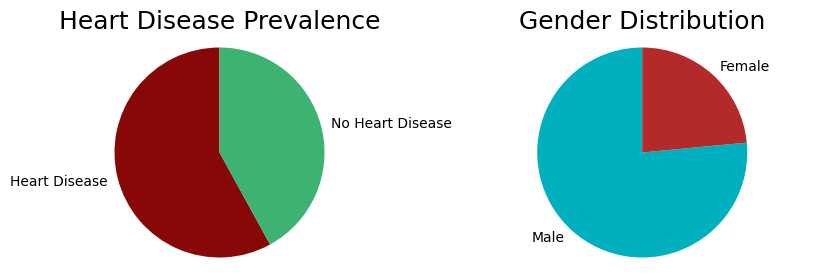

In [6]:
plt.figure(figsize=[10,3])
plt.subplot(1, 2, 1)
plt.pie(df.target.value_counts(), labels = ['Heart Disease', 'No Heart Disease'], startangle= 90, colors= ['#880808', '#3CB371'])
plt.axis('equal')
plt.title('Heart Disease Prevalence', fontsize = 18)
plt.subplot(1, 2, 2)
plt.pie(df.gender.value_counts(), labels = ['Male', 'Female'], startangle= 90, colors= ['#00b0be', '#B42A2A'])
plt.axis('equal')
plt.title('Gender Distribution', fontsize= 18)
plt.show()
plt.close()

#### Visual inspection of the distribution of Age with a histogram

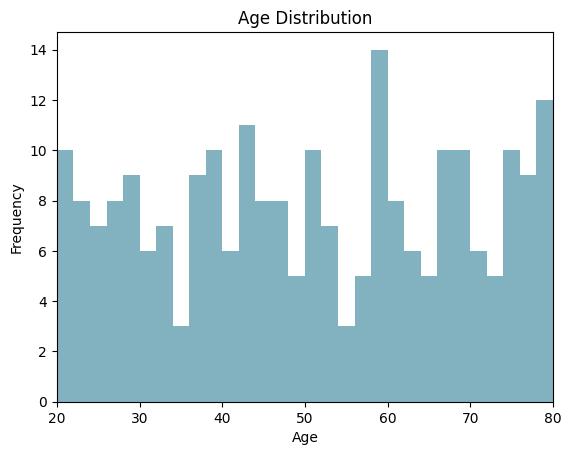

In [7]:
plt.hist(df.age[df.gender == 0], bins= 30, color = '#82B2C0')
plt.xlim(20,80)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show() 
plt.close()

*This shows:*
- There is a fairly even age distribution across the dataset

#### Is the age distribution consistant with both genders, and is there an association with Age and Heart Disease Diagnoisis?

/var/folders/hz/mtt8h5nn1m9d1j0nvjg4351c0000gn/T/ipykernel_96634/1305503803.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


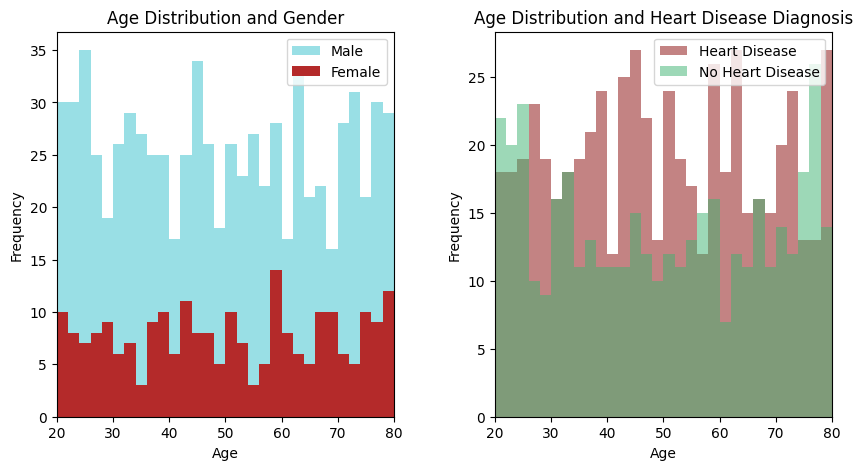

In [8]:
plt.figure(figsize=[10,5])
plt.subplot(1, 2, 1)
plt.hist(df.age[df.gender == 1], bins= 30, color = '#00b0be', alpha = 0.4)
plt.hist(df.age[df.gender == 0], bins= 30, color = '#B42A2A')
plt.legend()
plt.xlim(20,80)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution and Gender')
plt.legend(['Male', 'Female'])

plt.subplot(1, 2, 2)
plt.hist(df.age[df.target == 1], bins= 30, color = '#880808', alpha = 0.5)
plt.hist(df.age[df.target == 0], bins= 30, color = '#3CB371', alpha = 0.5)
plt.xlim(20,80)
plt.legend(['Heart Disease', 'No Heart Disease'], loc = 1)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution and Heart Disease Diagnosis')
plt.subplots_adjust(wspace=0.3)
plt.show() 
plt.close()

*This shows:*
- Even age distribution across the dataset for both genders
- No obvious correlation between Age and Heart Disease Diagnosis

### Analysis of correlation between all variables with a heatmap:

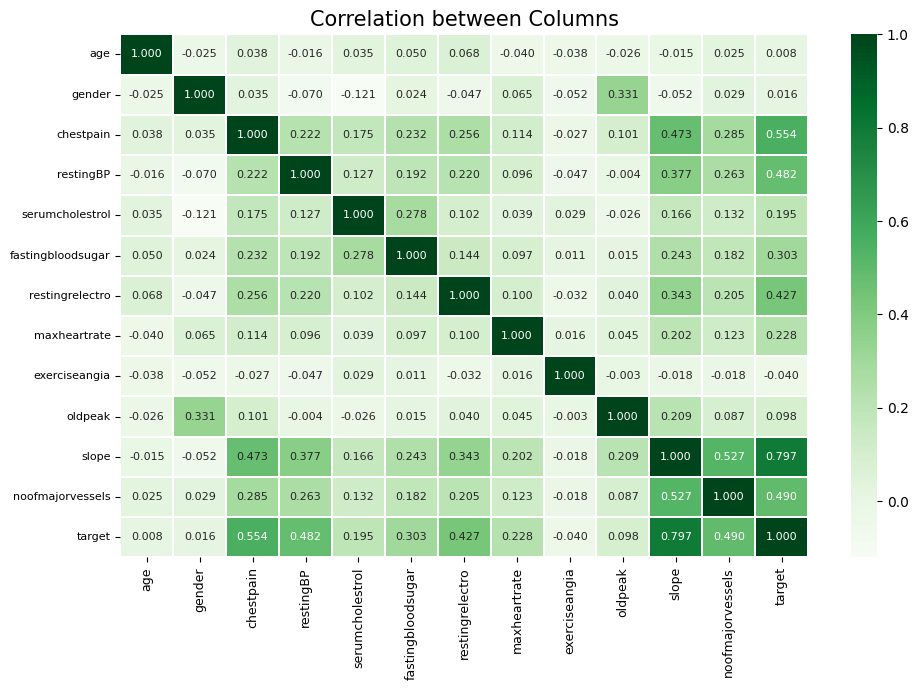

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.drop("patientid", axis=1).corr(), linewidths=0.05, annot=True, annot_kws={"size": 8}, fmt=".3f", cmap="Greens")
plt.xticks(fontsize=9)
plt.yticks(fontsize=8)
plt.title("Correlation between Columns", fontsize=15)
plt.tight_layout()
plt.show()

*This shows:*
- The only strong correlation (>0.6) between columns is between Slope and Target (Heart Disease Diagnosis)
- There is a moderate association (0.4 - 0.6) between Slope and Number of Major Vessels, Resting Electro and Target, Chestpain and Target, and Slope and Chest Pain

### Analysis of continuous variables with Heart Disease Diagnosis

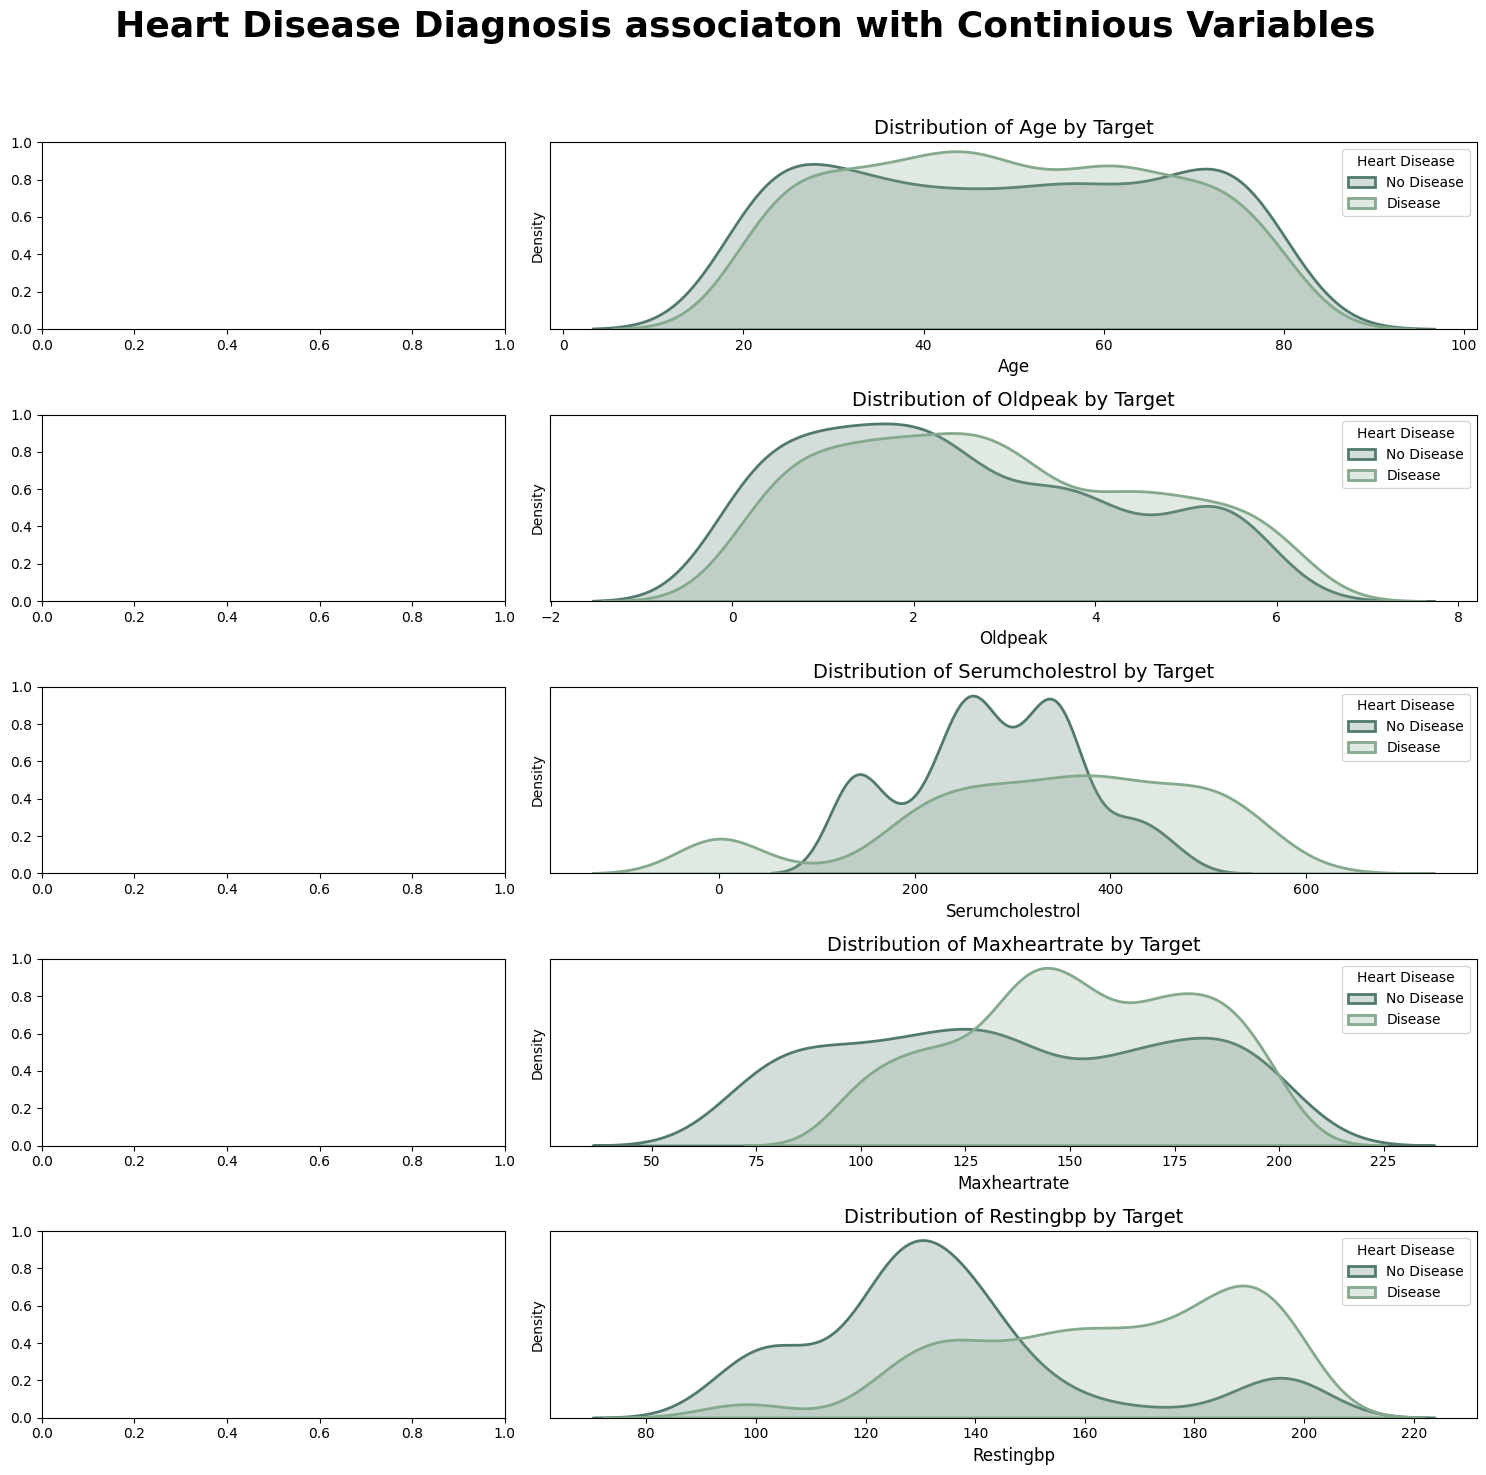

In [39]:
continuous_features = ['age', 'oldpeak', 'serumcholestrol', 'maxheartrate', 'restingBP']

fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15, 15), gridspec_kw={'width_ratios': [1, 2]})

for i, col in enumerate(continuous_features):
    sns.kdeplot(data=df[df["target"] == 0], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='No Disease', color='#52796f')
    sns.kdeplot(data=df[df["target"] == 1], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='Disease', color='#84a98c')
    ax[i, 1].set_yticks([])
    ax[i, 1].legend(title='Heart Disease', loc='upper right', fontsize=10)
    ax[i, 1].set_xlabel(col.capitalize(), fontsize=12)
    ax[i, 1].set_title(f'Distribution of {col.capitalize()} by Target', fontsize=14)

plt.suptitle('Heart Disease Diagnosis associaton with Continious Variables', fontsize = 26, weight = 'bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()